# Modeling Analysis

In [1]:
import configuration
import pandas as pd
from utils import plot_scatter

out_path = configuration.output_path + r"/plots/modeling_analysis/"

In [2]:
final_result = pd.read_csv(configuration.output_path + r"/tables/final_result_modeling.csv")

In [3]:
final_result

,Model,Window Size,Look Ahead,Indexed,MSE Train,MAE Train,MSE Test,MAE Test,Exp Train,Std Train,IC Train,Exp Test,Std Test,IC Test,Sharp Ratio Train,Sharp Ratio Test
0,CNN,52,1,True,0.110935,0.252927,51.843781,6.274662,6.990959,156.686367,-0.003088,2.932832,26.680419,0.323363,0.044618,0.109925
1,CNN,52,1,False,0.000524,0.016421,0.000730,0.018908,2.007026,16.824332,0.087357,6.412469,77.139127,-0.000584,0.119293,0.083129
2,MLP,52,1,True,0.063932,0.172878,1.814036,0.997730,2.112883,20.975109,0.050229,3.483840,30.475937,0.351075,0.100733,0.114314
3,MLP,52,1,False,0.000496,0.015940,0.000674,0.017642,7.546292,156.860680,0.251223,1.765596,10.327473,-0.028215,0.048108,0.170961
4,LSTM,52,1,True,0.085149,0.207501,53.153751,6.087679,1.703126,14.974041,0.013897,2.259406,18.719236,0.350200,0.113739,0.120700
5,LSTM,52,1,False,0.000534,0.016486,0.000657,0.017513,1.284543,6.786968,-0.090129,2.928132,26.645067,-0.072450,0.189266,0.109894
6,CNN,52,4,True,0.071000,0.195154,8.917365,2.060445,0.081698,0.365934,0.219648,0.062853,0.393189,0.431542,0.223260,0.159854
7,CNN,52,4,False,0.001346,0.026481,0.003402,0.042906,0.495670,1.448331,0.516734,0.342300,1.131788,0.074463,0.342235,0.302442
8,MLP,52,4,True,0.123379,0.266551,7.856489,1.994954,0.050230,0.425804,0.348807,0.066778,0.423226,0.450087,0.117965,0.157784
9,MLP,52,4,False,0.001646,0.029383,0.002573,0.036673,0.429000,1.462166,0.316871,0.367247,2.188760,-0.025022,0.293400,0.167788


In [4]:
final_result.groupby(['Model'])[['Sharp Ratio Train', 'Sharp Ratio Test']].mean()

,Sharp Ratio Train,Sharp Ratio Test
Model,,
CNN,0.422557,0.182786
LSTM,0.259705,0.008442
MLP,0.379148,0.117470


In [5]:
final_result.groupby(['Look Ahead'])[['Sharp Ratio Train', 'Sharp Ratio Test']].mean()

,Sharp Ratio Train,Sharp Ratio Test
Look Ahead,,
1,0.102626,0.118154
4,0.240992,0.193359
13,0.376402,-0.107425
52,0.695193,0.207509


In [6]:
final_result.groupby(['Indexed'])[['Sharp Ratio Train', 'Sharp Ratio Test']].mean()

,Sharp Ratio Train,Sharp Ratio Test
Indexed,,
False,0.603885,0.138645
True,0.103722,0.067154


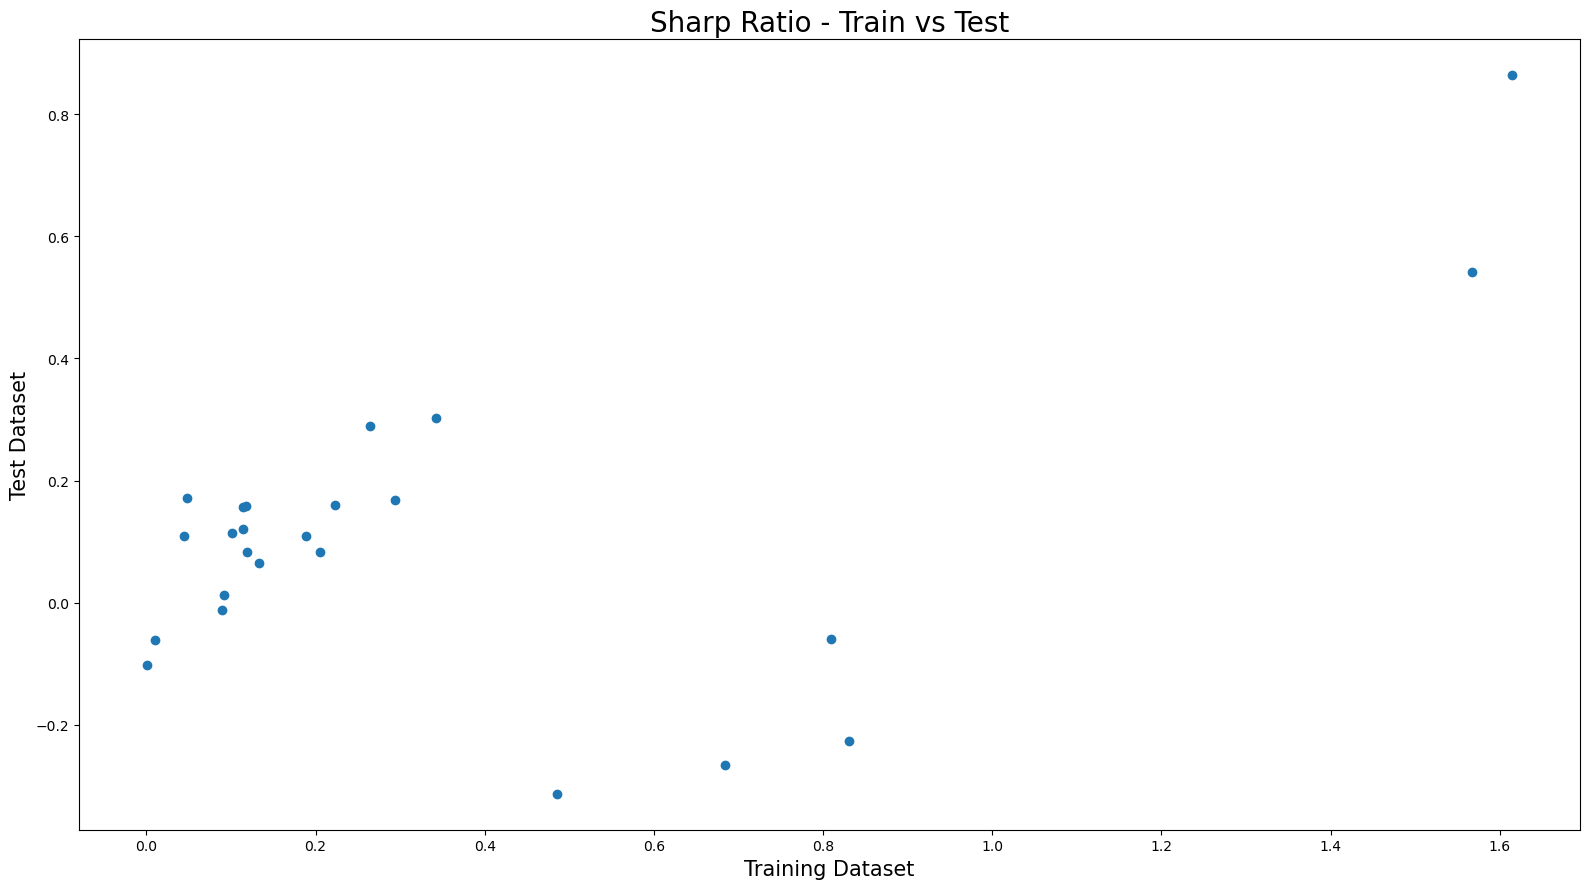

In [7]:
plot_scatter(final_result['Sharp Ratio Train'], final_result['Sharp Ratio Test'], xlabel='Training Dataset', ylabel='Test Dataset', title='Sharp Ratio - Train vs Test', output_path=out_path)

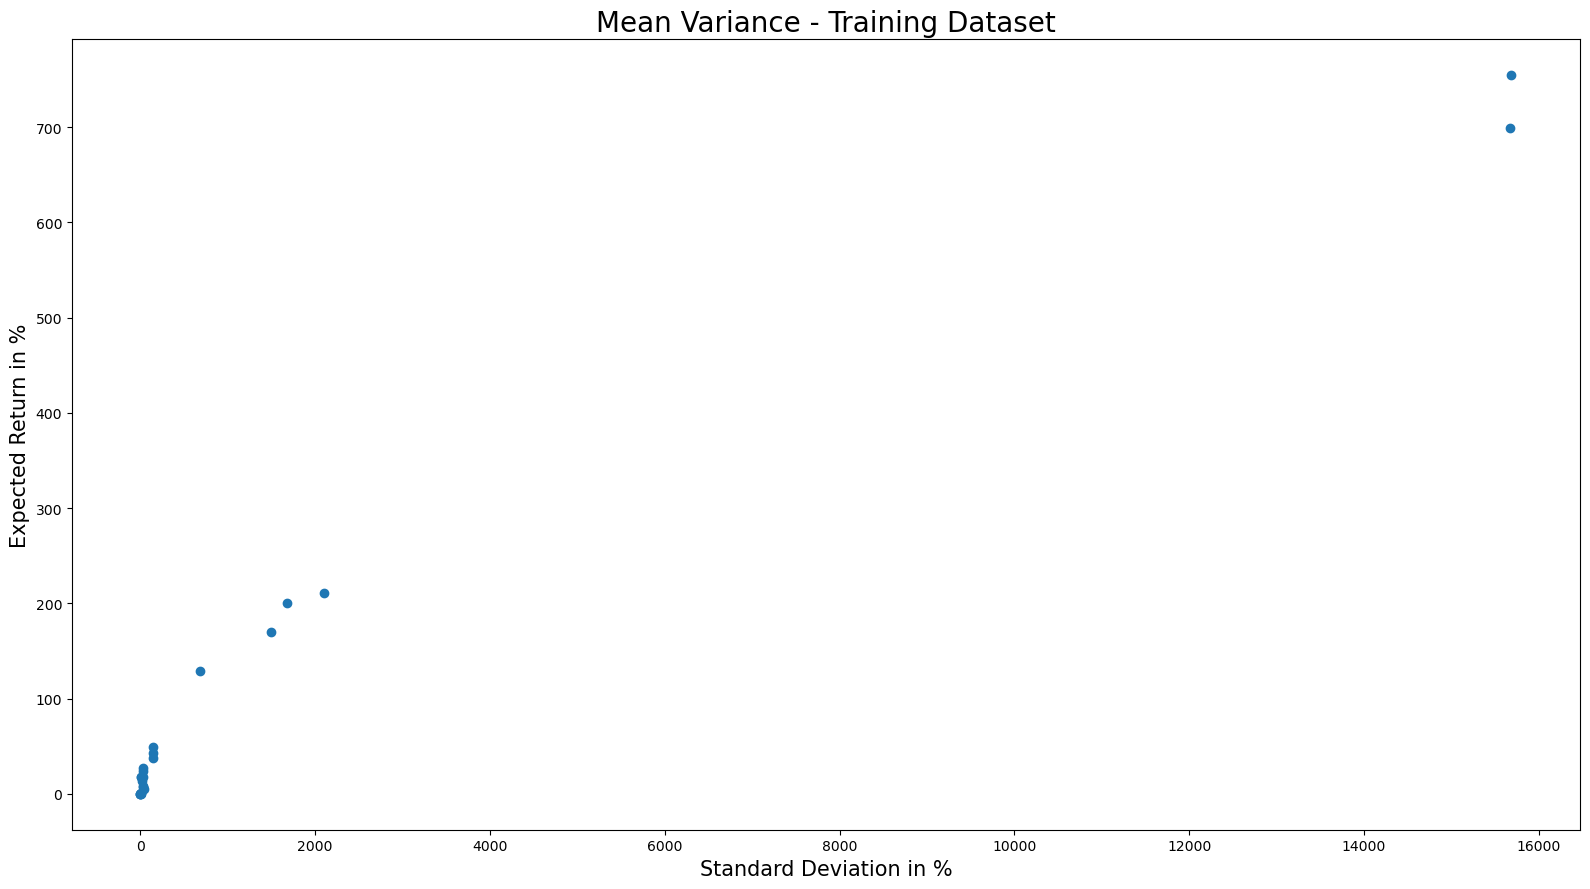

In [8]:
plot_scatter(100 * final_result['Std Train'], 100 * final_result['Exp Train'], ylabel='Expected Return in %', xlabel='Standard Deviation in %', title='Mean Variance - Training Dataset', output_path=out_path)

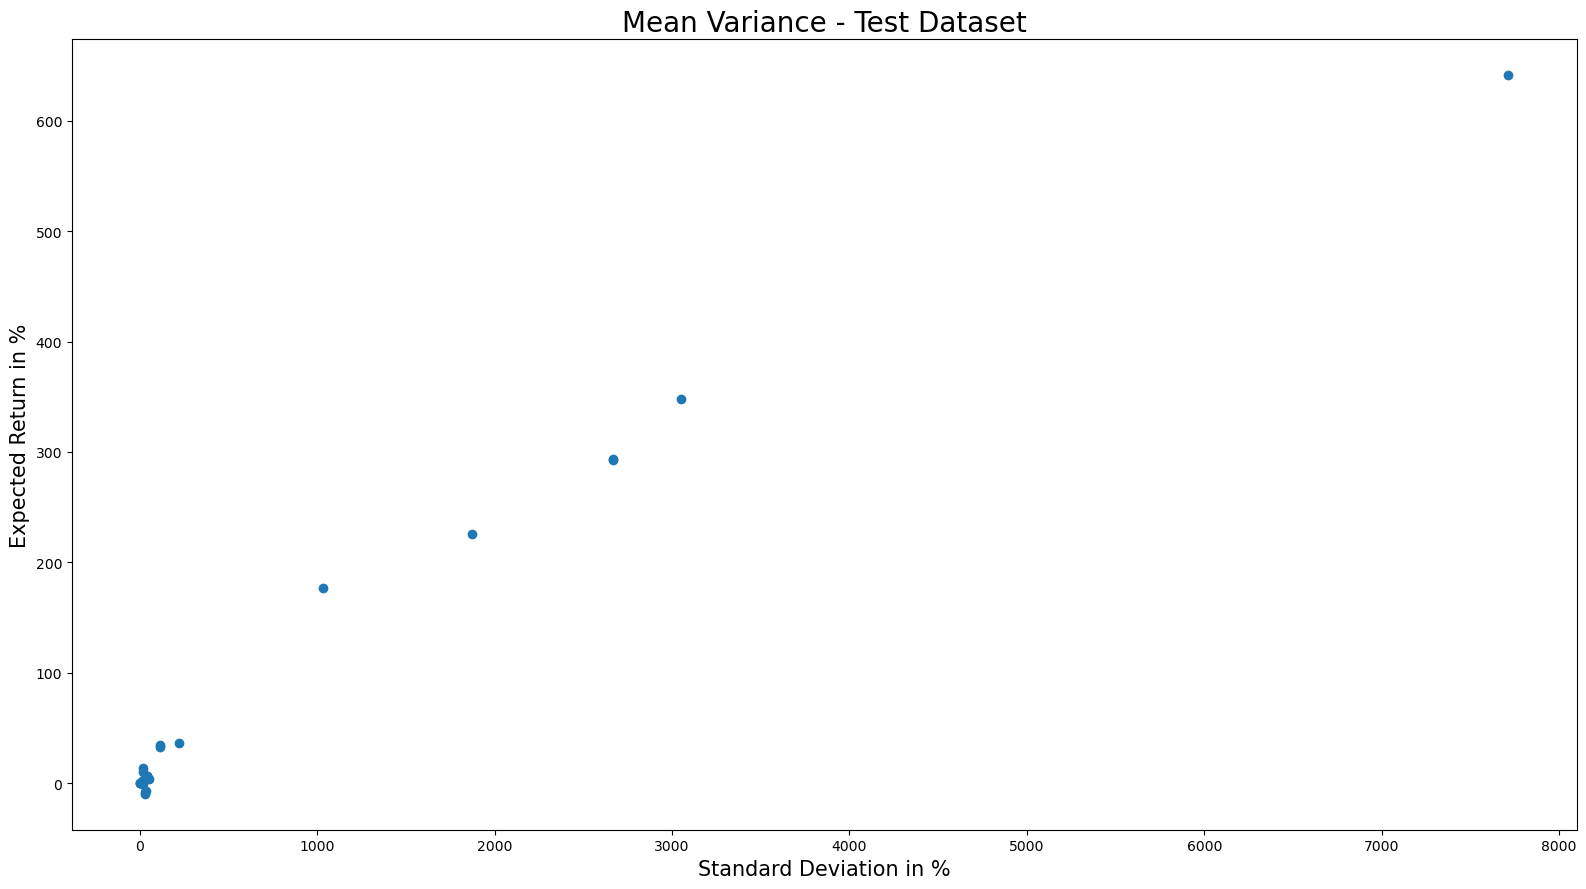

In [9]:
plot_scatter(100 * final_result['Std Test'], 100 * final_result['Exp Test'], ylabel='Expected Return in %', xlabel='Standard Deviation in %', title='Mean Variance - Test Dataset', output_path=out_path)

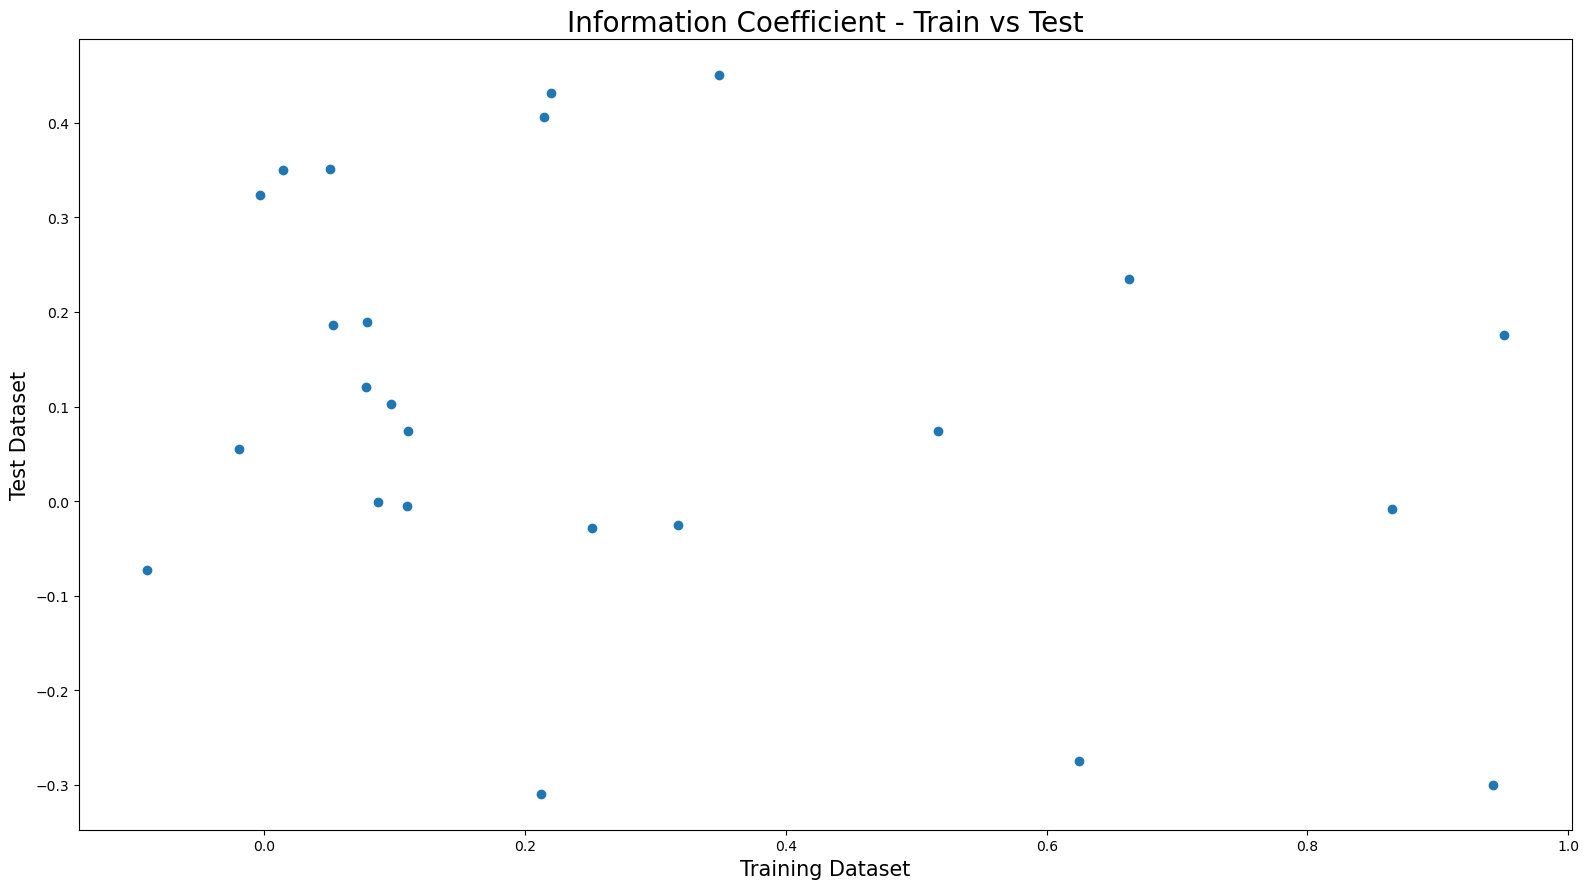

In [10]:
plot_scatter(final_result['IC Train'], final_result['IC Test'], xlabel='Training Dataset', ylabel='Test Dataset', title='Information Coefficient - Train vs Test', output_path=out_path)

In [11]:
100 * final_result.groupby("Indexed")[['Std Test', 'Exp Test']].mean()

,Std Test,Exp Test
Indexed,,
False,1000.406802,100.925321
True,646.524448,73.845698


In [12]:
100 * final_result.groupby("Look Ahead")[['Std Test', 'Exp Test']].mean()

,Std Test,Exp Test
Look Ahead,,
1,3166.454318,329.704601
4,96.160593,20.136446
13,20.928220,-3.927763
52,10.319370,3.628753


In [13]:
100 * final_result.groupby("Look Ahead")[['Std Train', 'Exp Train']].mean()

,Std Train,Exp Train
Look Ahead,,
1,6218.458291,360.747143
4,90.875582,24.985516
13,21.991767,11.839557
52,7.541264,8.107833
